In [51]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
import datetime
from pandas.plotting import scatter_matrix

from app import Bank
import app.utils

import datetime

In [53]:
bank = Bank('DKB')
print(f'Bank: {bank.name}')

Bank: DKB


## Accounts

In [54]:
bank.accounts

,id,firstname,lastname,balance


## Transactions

In [55]:
bank.transactions

,id,sender_id,recipient_id,amount,subject,category,timestamp


## Open Accounts

In [56]:
bank.open_account(account_id=1, firstname='Dalia', lastname='Das')
bank.open_account(account_id=2, firstname='Matthias', lastname='Rettenmeier')
bank.open_account(account_id=3, firstname='Manuel', lastname='Wiedenmann')

,id,firstname,lastname,balance
0,1,Dalia,Das,0.0
1,2,Matthias,Rettenmeier,0.0
2,3,Manuel,Wiedenmann,0.0


## Add transactions

In [57]:
bank.add_transaction(transaction_id=0,
                     sender_id=1,
                     recipient_id=2,
                     subject='Mein Weltbild',
                     amount=100.0,
                     category='Bücher',
                     timestamp=datetime.datetime.utcnow())

,id,sender_id,recipient_id,amount,subject,category,timestamp
0,0,1,2,100.0,Mein Weltbild,Bücher,2019-02-11 12:37:18.069789


In [86]:
transactions = [
    {'transaction_id': 1,
     'sender_id': 1,
     'recipient_id': 2,
     'subject': 'Data Science für Dummies',
     'amount': 26.99,
     'category': 'Bücher',
     'timestamp': app.utils.random_timestamp()},
    {'transaction_id': 2,
     'sender_id': 1,
     'recipient_id': 3,
     'subject': 'Python programmieren lernen für Dummies',
     'amount': 19.99,
     'category': 'Bücher',
     'timestamp': app.utils.random_timestamp()},
    {'transaction_id': 3,
     'sender_id': 3,
     'recipient_id': 1,
     'subject': 'Mittagessen',
     'amount': 20.,
     'category': 'Essen',
     'timestamp': app.utils.random_timestamp()},
    {'transaction_id': 4,
     'sender_id': 2,
     'recipient_id': 3,
     'subject': 'Drinks',
     'amount': 40.,
     'category': 'Lifestyle',
     'timestamp': app.utils.random_timestamp()},
]

for transaction in transactions:
    bank.add_transaction(**transaction)
    
bank.transactions

,id,sender_id,recipient_id,amount,subject,category,timestamp
0,1,1,2,26.99,Data Science für Dummies,Bücher,2018-05-02 12:37:19.020567
1,4,2,3,40.00,Drinks,Lifestyle,2018-07-11 12:37:19.020593
2,3,3,1,20.00,Mittagessen,Essen,2018-11-21 12:37:19.020588
3,2,1,3,19.99,Python programmieren lernen für Dummies,Bücher,2019-01-17 12:37:19.020582
4,0,1,2,100.00,Mein Weltbild,Bücher,2019-02-11 12:37:18.069789
5,1,1,2,26.99,Data Science für Dummies,Bücher,2018-06-01 13:02:37.759510
6,2,1,3,19.99,Python programmieren lernen für Dummies,Bücher,2018-05-09 13:02:37.759522
7,3,3,1,20.00,Mittagessen,Essen,2018-10-28 13:02:37.759525
8,4,2,3,40.00,Drinks,Lifestyle,2018-05-16 13:02:37.759528


In [59]:
bank.transactions.describe()

,amount
count,5.000000
mean,41.396000
std,33.763575
min,19.990000
25%,20.000000
50%,26.990000
75%,40.000000
max,100.000000


## .groupby() + agg()

In [60]:
grouped_by_category = bank.transactions.groupby('category')

In [71]:
grouped_by_category.agg({'id': 'count'})

,id
category,
Bücher,3
Essen,1
Lifestyle,1


In [73]:
grouped_by_category.agg({'amount': 'sum'})

,amount
category,
Bücher,146.98
Essen,20.00
Lifestyle,40.00


In [63]:
grouped_by_category.agg({'amount': 'max'})

,amount
category,
Bücher,100.0
Essen,20.0
Lifestyle,40.0


In [64]:
grouped_by_category.agg({'amount': 'min'})

,amount
category,
Bücher,19.99
Essen,20.00
Lifestyle,40.00


### Tasks

- Group by sender_id
- Group by recipient_id


In [68]:
grouped_by_sender_id = bank.transactions.groupby('sender_id')
grouped_by_sender_id.agg({'amount': 'count'})

,amount
sender_id,
1,3
2,1
3,1


In [79]:
grouped_by_sender_id.agg({'sender_id': 'count', 'amount':'sum'})

,sender_id,amount
sender_id,,
1,3,146.98
2,1,40.00
3,1,20.00


In [69]:
grouped_by_recipient_id = bank.transactions.groupby('recipient_id')
grouped_by_recipient_id.agg({'amount': 'count'})

,amount
recipient_id,
1,1
2,2
3,2


## Cleanup

In [87]:
bank.transactions

,id,sender_id,recipient_id,amount,subject,category,timestamp
0,1,1,2,26.99,Data Science für Dummies,Bücher,2018-05-02 12:37:19.020567
1,4,2,3,40.00,Drinks,Lifestyle,2018-07-11 12:37:19.020593
2,3,3,1,20.00,Mittagessen,Essen,2018-11-21 12:37:19.020588
3,2,1,3,19.99,Python programmieren lernen für Dummies,Bücher,2019-01-17 12:37:19.020582
4,0,1,2,100.00,Mein Weltbild,Bücher,2019-02-11 12:37:18.069789
5,1,1,2,26.99,Data Science für Dummies,Bücher,2018-06-01 13:02:37.759510
6,2,1,3,19.99,Python programmieren lernen für Dummies,Bücher,2018-05-09 13:02:37.759522
7,3,3,1,20.00,Mittagessen,Essen,2018-10-28 13:02:37.759525
8,4,2,3,40.00,Drinks,Lifestyle,2018-05-16 13:02:37.759528


In [88]:
bank.transactions.drop_duplicates('id', inplace=True)

In [89]:
bank.transactions

,id,sender_id,recipient_id,amount,subject,category,timestamp
0,1,1,2,26.99,Data Science für Dummies,Bücher,2018-05-02 12:37:19.020567
1,4,2,3,40.00,Drinks,Lifestyle,2018-07-11 12:37:19.020593
2,3,3,1,20.00,Mittagessen,Essen,2018-11-21 12:37:19.020588
3,2,1,3,19.99,Python programmieren lernen für Dummies,Bücher,2019-01-17 12:37:19.020582
4,0,1,2,100.00,Mein Weltbild,Bücher,2019-02-11 12:37:18.069789


In [83]:
bank.transactions.sort_values('timestamp', inplace=True)

In [84]:
bank.transactions

,id,sender_id,recipient_id,amount,subject,category,timestamp
1,1,1,2,26.99,Data Science für Dummies,Bücher,2018-05-02 12:37:19.020567
4,4,2,3,40.00,Drinks,Lifestyle,2018-07-11 12:37:19.020593
3,3,3,1,20.00,Mittagessen,Essen,2018-11-21 12:37:19.020588
2,2,1,3,19.99,Python programmieren lernen für Dummies,Bücher,2019-01-17 12:37:19.020582
0,0,1,2,100.00,Mein Weltbild,Bücher,2019-02-11 12:37:18.069789


## Add columns

In [90]:
# Wir erstellen eine neue Column tax_amount indem wir die Column amount mit 0.19 multiplizieren
bank.transactions['tax_amount'] = bank.transactions['amount'] * 0.19

In [91]:
bank.transactions

,id,sender_id,recipient_id,amount,subject,category,timestamp,tax_amount
0,1,1,2,26.99,Data Science für Dummies,Bücher,2018-05-02 12:37:19.020567,5.1281
1,4,2,3,40.00,Drinks,Lifestyle,2018-07-11 12:37:19.020593,7.6000
2,3,3,1,20.00,Mittagessen,Essen,2018-11-21 12:37:19.020588,3.8000
3,2,1,3,19.99,Python programmieren lernen für Dummies,Bücher,2019-01-17 12:37:19.020582,3.7981
4,0,1,2,100.00,Mein Weltbild,Bücher,2019-02-11 12:37:18.069789,19.0000


### Tasks

- [.apply() docs](http://pandas.pydata.org/pandas-docs/version/0.24/reference/api/pandas.DataFrame.apply.html)

In [104]:
# Unser dict zum Zuordnen der richtigen Steuersätze
# Key ist die Category, der value ist der Stuersatz
tax_rates = {
    'Bücher': 0.07,
    'Essen': 0.07,
    'Lifestyle': 0.19,
}

# Erstelle eine neue Column tax_rate indem du auf der Column category .apply() aufrufst
# Nutze das tax_rates dict in der lambda function von .apply()

bank.transactions['tax_rate'] = bank.transactions['category'].apply(lambda x:tax_rates.get(x))

In [105]:
bank.transactions

,id,sender_id,recipient_id,amount,subject,category,timestamp,tax_amount,tax_rate
0,1,1,2,26.99,Data Science für Dummies,Bücher,2018-05-02 12:37:19.020567,5.1281,0.07
1,4,2,3,40.00,Drinks,Lifestyle,2018-07-11 12:37:19.020593,7.6000,0.19
2,3,3,1,20.00,Mittagessen,Essen,2018-11-21 12:37:19.020588,3.8000,0.07
3,2,1,3,19.99,Python programmieren lernen für Dummies,Bücher,2019-01-17 12:37:19.020582,3.7981,0.07
4,0,1,2,100.00,Mein Weltbild,Bücher,2019-02-11 12:37:18.069789,19.0000,0.07


In [108]:
# Berechne nun den richtigen tax_amount auf Grundlage der tax_rate Column
bank.transactions['tax_amount'] = bank.transactions['amount']*bank.transactions['tax_rate']

In [109]:
bank.transactions

,id,sender_id,recipient_id,amount,subject,category,timestamp,tax_amount,tax_rate
0,1,1,2,26.99,Data Science für Dummies,Bücher,2018-05-02 12:37:19.020567,1.8893,0.07
1,4,2,3,40.00,Drinks,Lifestyle,2018-07-11 12:37:19.020593,7.6000,0.19
2,3,3,1,20.00,Mittagessen,Essen,2018-11-21 12:37:19.020588,1.4000,0.07
3,2,1,3,19.99,Python programmieren lernen für Dummies,Bücher,2019-01-17 12:37:19.020582,1.3993,0.07
4,0,1,2,100.00,Mein Weltbild,Bücher,2019-02-11 12:37:18.069789,7.0000,0.07


## Filter with .loc[]

In [ ]:
# Filter alle Bücher
bank.transactions.loc[bank.transactions['category'] == 'Bücher']

In [110]:
# Filter alle Transaktionen mit einem amount > 20

bank.transactions.loc[bank.transactions['amount'] > 20]

,id,sender_id,recipient_id,amount,subject,category,timestamp,tax_amount,tax_rate
0,1,1,2,26.99,Data Science für Dummies,Bücher,2018-05-02 12:37:19.020567,1.8893,0.07
1,4,2,3,40.00,Drinks,Lifestyle,2018-07-11 12:37:19.020593,7.6000,0.19
4,0,1,2,100.00,Mein Weltbild,Bücher,2019-02-11 12:37:18.069789,7.0000,0.07


In [111]:
# Filter alle Bücher mit einem amount > 20

# Erst die Bücher
books = bank.transactions.loc[bank.transactions['category'] == 'Bücher']

# Dann den amount
books_with_amount_greater_20 = books.loc[books['amount'] > 20]

books_with_amount_greater_20

,id,sender_id,recipient_id,amount,subject,category,timestamp,tax_amount,tax_rate
0,1,1,2,26.99,Data Science für Dummies,Bücher,2018-05-02 12:37:19.020567,1.8893,0.07
4,0,1,2,100.00,Mein Weltbild,Bücher,2019-02-11 12:37:18.069789,7.0000,0.07


In [118]:
# Filter alle Transaktionen nach einem Datum (timestamp)
timestamp = app.utils.random_timestamp()

bank.transactions.loc[bank.transactions['timestamp'] > timestamp]


,id,sender_id,recipient_id,amount,subject,category,timestamp,tax_amount,tax_rate
2,3,3,1,20.00,Mittagessen,Essen,2018-11-21 12:37:19.020588,1.4000,0.07
3,2,1,3,19.99,Python programmieren lernen für Dummies,Bücher,2019-01-17 12:37:19.020582,1.3993,0.07
4,0,1,2,100.00,Mein Weltbild,Bücher,2019-02-11 12:37:18.069789,7.0000,0.07


## Plots

In [133]:
by_timestamp = bank.transactions.set_index('timestamp')
by_timestamp

,id,sender_id,recipient_id,amount,subject,category,tax_amount,tax_rate
timestamp,,,,,,,,
2018-05-02 12:37:19.020567,1,1,2,26.99,Data Science für Dummies,Bücher,1.8893,0.07
2018-07-11 12:37:19.020593,4,2,3,40.00,Drinks,Lifestyle,7.6000,0.19
2018-11-21 12:37:19.020588,3,3,1,20.00,Mittagessen,Essen,1.4000,0.07
2019-01-17 12:37:19.020582,2,1,3,19.99,Python programmieren lernen für Dummies,Bücher,1.3993,0.07
2019-02-11 12:37:18.069789,0,1,2,100.00,Mein Weltbild,Bücher,7.0000,0.07


In [138]:
columns_tp_drop = ['sender_id', 'recipient_id', 'id', 'tax_rate', 'subject', 'category']
by_timestamp_dropped = by_timestamp.drop(columns_tp_drop, axis = 1)
by_timestamp_dropped


,amount,tax_amount
timestamp,,
2018-05-02 12:37:19.020567,26.99,1.8893
2018-07-11 12:37:19.020593,40.00,7.6000
2018-11-21 12:37:19.020588,20.00,1.4000
2019-01-17 12:37:19.020582,19.99,1.3993
2019-02-11 12:37:18.069789,100.00,7.0000


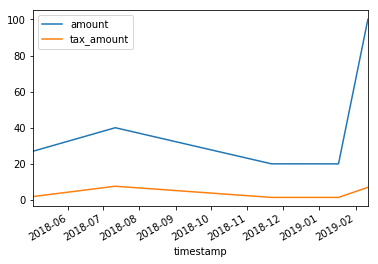

In [139]:
by_timestamp_dropped.plot()

In [144]:
bank.transactions.merge(bank.accounts, left_on='sender_id', right_on='id', suffixes=('_transaction', '_sender_account'))

,id_transaction,sender_id,recipient_id,amount,subject,category,timestamp,tax_amount,tax_rate,id_sender_account,firstname,lastname,balance
0,1,1,2,26.99,Data Science für Dummies,Bücher,2018-05-02 12:37:19.020567,1.8893,0.07,1,Dalia,Das,0.0
1,2,1,3,19.99,Python programmieren lernen für Dummies,Bücher,2019-01-17 12:37:19.020582,1.3993,0.07,1,Dalia,Das,0.0
2,0,1,2,100.00,Mein Weltbild,Bücher,2019-02-11 12:37:18.069789,7.0000,0.07,1,Dalia,Das,0.0
3,4,2,3,40.00,Drinks,Lifestyle,2018-07-11 12:37:19.020593,7.6000,0.19,2,Matthias,Rettenmeier,0.0
4,3,3,1,20.00,Mittagessen,Essen,2018-11-21 12:37:19.020588,1.4000,0.07,3,Manuel,Wiedenmann,0.0


In [149]:
bank.accounts.merge(bank.transactions, left_on='id', right_on='sender_id', suffixes=('_sender_account', '_transaction'), )

,id_sender_account,firstname,lastname,balance,id_transaction,sender_id,recipient_id,amount,subject,category,timestamp,tax_amount,tax_rate
0,1,Dalia,Das,0.0,1,1,2,26.99,Data Science für Dummies,Bücher,2018-05-02 12:37:19.020567,1.8893,0.07
1,1,Dalia,Das,0.0,2,1,3,19.99,Python programmieren lernen für Dummies,Bücher,2019-01-17 12:37:19.020582,1.3993,0.07
2,1,Dalia,Das,0.0,0,1,2,100.00,Mein Weltbild,Bücher,2019-02-11 12:37:18.069789,7.0000,0.07
3,2,Matthias,Rettenmeier,0.0,4,2,3,40.00,Drinks,Lifestyle,2018-07-11 12:37:19.020593,7.6000,0.19
4,3,Manuel,Wiedenmann,0.0,3,3,1,20.00,Mittagessen,Essen,2018-11-21 12:37:19.020588,1.4000,0.07


In [162]:
bank.transactions.join(bank.accounts.rename(columns={'id':'sender_id'}).set_index('sender_id'), on = 'sender_id').sort_values(by=['id'])

,id,sender_id,recipient_id,amount,subject,category,timestamp,tax_amount,tax_rate,firstname,lastname,balance
4,0,1,2,100.00,Mein Weltbild,Bücher,2019-02-11 12:37:18.069789,7.0000,0.07,Dalia,Das,0.0
0,1,1,2,26.99,Data Science für Dummies,Bücher,2018-05-02 12:37:19.020567,1.8893,0.07,Dalia,Das,0.0
3,2,1,3,19.99,Python programmieren lernen für Dummies,Bücher,2019-01-17 12:37:19.020582,1.3993,0.07,Dalia,Das,0.0
2,3,3,1,20.00,Mittagessen,Essen,2018-11-21 12:37:19.020588,1.4000,0.07,Manuel,Wiedenmann,0.0
1,4,2,3,40.00,Drinks,Lifestyle,2018-07-11 12:37:19.020593,7.6000,0.19,Matthias,Rettenmeier,0.0


In [172]:
import numpy as np
import pandas as pd

In [193]:
bank.transactions['new_values'] = [1, 1, 1, 1, 1]
bank.transactions

,id,sender_id,recipient_id,amount,subject,category,timestamp,tax_amount,tax_rate,new_values
0,1,1,2,26.99,Data Science für Dummies,Bücher,2018-05-02 12:37:19.020567,1.8893,0.07,1
1,4,2,3,40.00,Drinks,Lifestyle,2018-07-11 12:37:19.020593,7.6000,0.19,1
2,3,3,1,20.00,Mittagessen,Essen,2018-11-21 12:37:19.020588,1.4000,0.07,1
3,2,1,3,19.99,Python programmieren lernen für Dummies,Bücher,2019-01-17 12:37:19.020582,1.3993,0.07,1
4,0,1,2,100.00,Mein Weltbild,Bücher,2019-02-11 12:37:18.069789,7.0000,0.07,1


In [183]:
empty_column = pd.DataFrame(columns=['key'])
empty_column = empty_column.append({'key':1}, ignore_index=True)
empty_column = empty_column.append({'key':1}, ignore_index=True)
empty_column = empty_column.append({'key':1}, ignore_index=True)
empty_column = empty_column.append({'key':1}, ignore_index=True)
empty_column = empty_column.append({'key':1}, ignore_index=True)
empty_column = empty_column.append({'key':1}, ignore_index=True)
empty_column = empty_column.append({'key':1}, ignore_index=True)
empty_column

,key
0,1
1,1
2,1
3,1
4,1
5,1
6,1


In [186]:
bank.transactions.merge(empty_column, left_on='sender_id', right_on='key')

,id,sender_id,recipient_id,amount,subject,category,timestamp,tax_amount,tax_rate,key
0,1,1,2,26.99,Data Science für Dummies,Bücher,2018-05-02 12:37:19.020567,1.8893,0.07,1
1,1,1,2,26.99,Data Science für Dummies,Bücher,2018-05-02 12:37:19.020567,1.8893,0.07,1
2,1,1,2,26.99,Data Science für Dummies,Bücher,2018-05-02 12:37:19.020567,1.8893,0.07,1
3,1,1,2,26.99,Data Science für Dummies,Bücher,2018-05-02 12:37:19.020567,1.8893,0.07,1
4,1,1,2,26.99,Data Science für Dummies,Bücher,2018-05-02 12:37:19.020567,1.8893,0.07,1
5,1,1,2,26.99,Data Science für Dummies,Bücher,2018-05-02 12:37:19.020567,1.8893,0.07,1
6,1,1,2,26.99,Data Science für Dummies,Bücher,2018-05-02 12:37:19.020567,1.8893,0.07,1
7,2,1,3,19.99,Python programmieren lernen für Dummies,Bücher,2019-01-17 12:37:19.020582,1.3993,0.07,1
8,2,1,3,19.99,Python programmieren lernen für Dummies,Bücher,2019-01-17 12:37:19.020582,1.3993,0.07,1
9,2,1,3,19.99,Python programmieren lernen für Dummies,Bücher,2019-01-17 12:37:19.020582,1.3993,0.07,1
